In [95]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_fr = pd.read_csv("the_office_lines_scripts.csv")

 Question 7: The average percent of lines each character contributed each episode per season

In [96]:
lines_per_character = data_fr.value_counts('speaker').to_frame()
lines_per_character.columns = ['nr_lines']
proper_char = lines_per_character.query("nr_lines <= 100")
data_fr.drop(data_fr[data_fr['speaker'].isin(list(proper_char.index))].index , inplace=True)

In [97]:
#print(data_fr.head(10))

In [107]:
from pandas import DataFrame
grouped_df = DataFrame({'lines_per_character' : data_fr.groupby('season')['episode','speaker'].value_counts()}).reset_index()


# print(grouped_df.head())
sum_lines_df = DataFrame({'sum_lines_episode' : grouped_df.groupby(['season', 'episode'])['lines_per_character'].agg('sum')}).reset_index()
# print(sum_lines_df.head())


def calculate_percentage(season, episode, lines):
    sum_lines_per_episode = sum_lines_df.loc[(sum_lines_df['season'] == season) & (sum_lines_df['episode'] == episode),  'sum_lines_episode'].iloc[0]
    return (lines / sum_lines_per_episode) * 100
grouped_df['average_per_episode'] = grouped_df.apply(lambda row: calculate_percentage(row['season'], row['episode'], row['lines_per_character']), axis=1)
print(grouped_df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12300\2746562421.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = DataFrame({'lines_per_character' : data_fr.groupby('season')['episode','speaker'].value_counts()}).reset_index()


      season  episode   speaker  lines_per_character  average_per_episode
0          1        5   Michael                  134            47.349823
1          1        6   Michael                  128            35.555556
2          1        4   Michael                  111            31.355932
3          1        2   Michael                  103            42.040816
4          1        1   Michael                   97            37.022901
...      ...      ...       ...                  ...                  ...
2896       9       13    Angela                    1             0.462963
2897       9       13     Kevin                    1             0.462963
2898       9        7     Creed                    1             0.371747
2899       9       14     Creed                    1             0.452489
2900       9        3  Meredith                    1             0.427350

[2901 rows x 5 columns]


In [134]:
grouped_df.groupby(['season', 'speaker'])['average_per_episode'].mean()

season  speaker
1       Angela      1.772390
        Darryl      6.007067
        Dwight     17.804594
        Jan         4.184391
        Jim        15.381549
                     ...    
9       Robert      1.935585
        Roy         3.754266
        Ryan        1.954355
        Stanley     1.833571
        Toby        2.773184
Name: average_per_episode, Length: 195, dtype: float64

In [121]:
grouped_by_season = DataFrame({'average_per_season' :grouped_df.groupby(['season', 'speaker'])['average_per_episode'].mean()}).reset_index()
print(grouped_by_season)

     season  speaker  average_per_season
0         1   Angela            1.772390
1         1   Darryl            6.007067
2         1   Dwight           17.804594
3         1      Jan            4.184391
4         1      Jim           15.381549
..      ...      ...                 ...
190       9   Robert            1.935585
191       9      Roy            3.754266
192       9     Ryan            1.954355
193       9  Stanley            1.833571
194       9     Toby            2.773184

[195 rows x 3 columns]


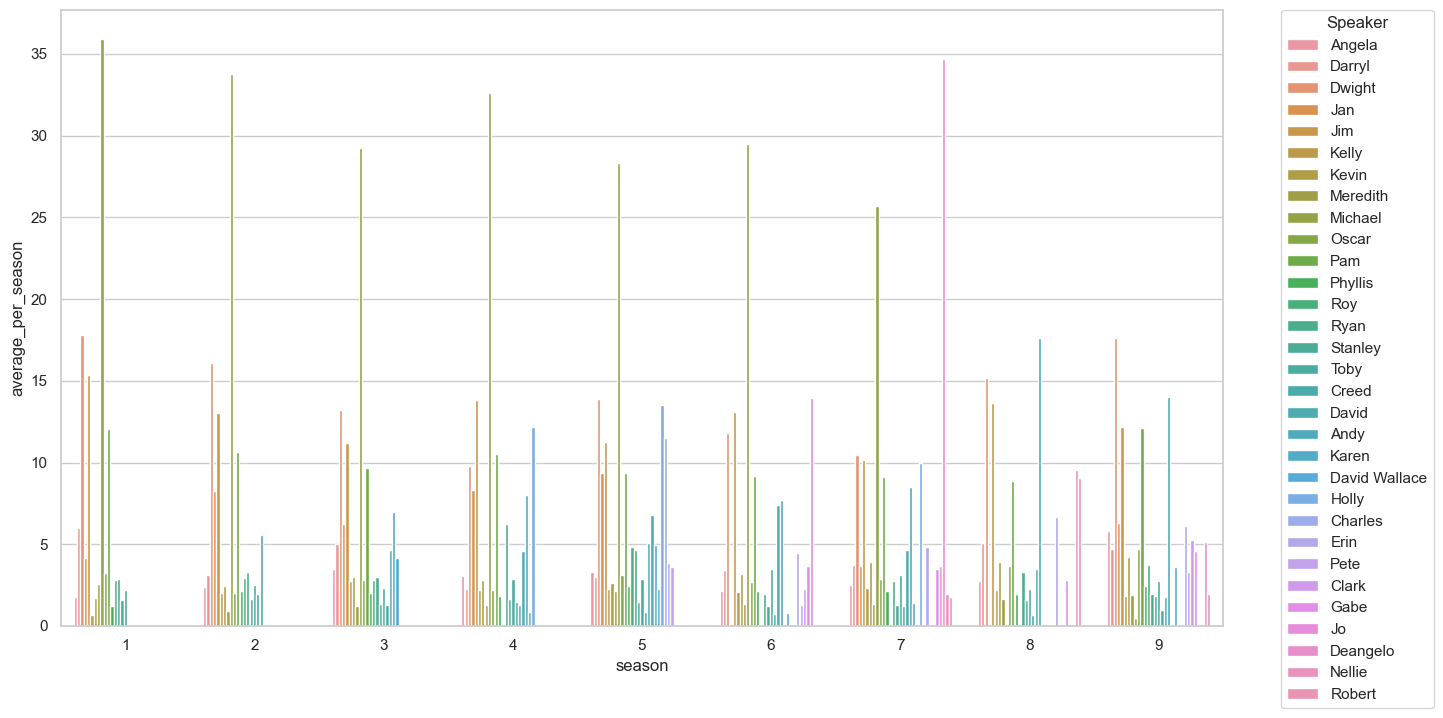

In [133]:
sns.set(rc = {'figure.figsize':(15,8)}, style ='whitegrid')
ax = sns.barplot(x="season", y="average_per_season", hue="speaker", data=grouped_by_season)
plt.legend(title='Speaker', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)